In this part of the notebook I'm handling the libraries

In [1]:
from mlxtend.data import loadlocal_mnist
import platform

In [2]:
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.python.keras.utils import np_utils

In [4]:
from numpy.random import seed
import tensorflow as tf

In [5]:
import numpy as np

In this part of the notebook I'm trying to see the data

In [6]:
X_train, y_train = loadlocal_mnist(
    images_path='fashion/train-images-idx3-ubyte', 
    labels_path='fashion/train-labels-idx1-ubyte')

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train.shape[0]

60000

In [9]:
X_train = X_train.reshape((60000, 28, 28))

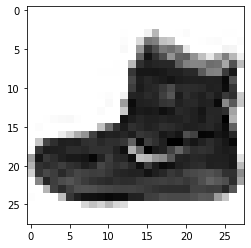

In [10]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [11]:
y_train[0]

9

In [12]:
X_test, y_test = loadlocal_mnist(
    images_path='fashion/t10k-images-idx3-ubyte', 
    labels_path='fashion/t10k-labels-idx1-ubyte')
X_test = X_test.reshape((10000, 28, 28))

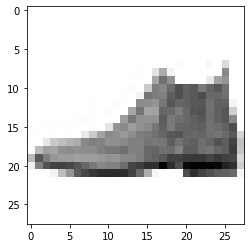

In [13]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

In [14]:
y_test[0]

9

In [15]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Random seed

In [16]:
SEED = 123
seed(SEED)
tf.random.set_seed(SEED)

Here I prepare the train test for the model

In [17]:
X_train /= 255
X_test /= 255

In [18]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

Here I build some models to compare how they run

In [14]:
model1 = Sequential()
model1.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model1.add(MaxPool2D(pool_size=(1,1)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [15]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
model1.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.4373 - accuracy: 0.8470 - val_loss: 0.3355 - val_accuracy: 0.8794
Epoch 2/10
469/469 [==============================] - 13s 27ms/step - loss: 0.2896 - accuracy: 0.8958 - val_loss: 0.3136 - val_accuracy: 0.8843
Epoch 3/10
469/469 [==============================] - 13s 27ms/step - loss: 0.2421 - accuracy: 0.9133 - val_loss: 0.2883 - val_accuracy: 0.8982
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.2090 - accuracy: 0.9240 - val_loss: 0.2932 - val_accuracy: 0.8920
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.1823 - accuracy: 0.9333 - val_loss: 0.2705 - val_accuracy: 0.9070
Epoch 6/10
469/469 [==============================] - 13s 29ms/step - loss: 0.1578 - accuracy: 0.9426 - val_loss: 0.2802 - val_accuracy: 0.9008
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.1380 - accuracy: 0.9499 - val_loss: 0.2743 - val_accuracy:

In [14]:
model2 = Sequential()
model2.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(1,1)))
model2.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(1,1)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [15]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 35s 74ms/step - loss: 0.4393 - accuracy: 0.8444 - val_loss: 0.3399 - val_accuracy: 0.8776
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.2870 - accuracy: 0.8949 - val_loss: 0.3081 - val_accuracy: 0.8855
Epoch 3/10
469/469 [==============================] - 36s 76ms/step - loss: 0.2374 - accuracy: 0.9147 - val_loss: 0.2733 - val_accuracy: 0.9028
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1962 - accuracy: 0.9280 - val_loss: 0.2680 - val_accuracy: 0.9044
Epoch 5/10
469/469 [==============================] - 38s 81ms/step - loss: 0.1643 - accuracy: 0.9396 - val_loss: 0.2553 - val_accuracy: 0.9127
Epoch 6/10
469/469 [==============================] - 37s 80ms/step - loss: 0.1348 - accuracy: 0.9503 - val_loss: 0.2553 - val_accuracy: 0.9156
Epoch 7/10
469/469 [==============================] - 36s 78ms/step - loss: 0.1051 - accuracy: 0.9620 - val_loss: 0.2631 - val_accuracy:

In [20]:
model3 = Sequential()
model3.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(1,1)))
model3.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='softmax', input_shape=(28,28,1)))
model3.add(MaxPool2D(pool_size=(1,1)))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [21]:
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
model3.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 65s 137ms/step - loss: 0.7055 - accuracy: 0.7480 - val_loss: 0.4376 - val_accuracy: 0.8433
Epoch 2/10
469/469 [==============================] - 61s 130ms/step - loss: 0.3728 - accuracy: 0.8668 - val_loss: 0.3898 - val_accuracy: 0.8607
Epoch 3/10
469/469 [==============================] - 66s 140ms/step - loss: 0.3237 - accuracy: 0.8835 - val_loss: 0.3433 - val_accuracy: 0.8754
Epoch 4/10
469/469 [==============================] - 66s 140ms/step - loss: 0.2972 - accuracy: 0.8924 - val_loss: 0.3240 - val_accuracy: 0.8835
Epoch 5/10
469/469 [==============================] - 64s 136ms/step - loss: 0.2728 - accuracy: 0.9010 - val_loss: 0.3020 - val_accuracy: 0.8922
Epoch 6/10
469/469 [==============================] - 67s 143ms/step - loss: 0.2516 - accuracy: 0.9068 - val_loss: 0.2927 - val_accuracy: 0.8977
Epoch 7/10
469/469 [==============================] - 64s 137ms/step - loss: 0.2327 - accuracy: 0.9144 - val_loss: 0.2868 - val_ac

In [23]:
model4 = Sequential()
model4.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='softmax', input_shape=(28,28,1)))
model4.add(MaxPool2D(pool_size=(1,1)))
model4.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='softmax', input_shape=(28,28,1)))
model4.add(MaxPool2D(pool_size=(1,1)))
model4.add(Flatten())
model4.add(Dense(100, activation='relu'))
model4.add(Dense(10, activation='softmax'))

In [24]:
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
model4.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 66s 138ms/step - loss: 2.3049 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
469/469 [==============================] - 66s 141ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
469/469 [==============================] - 66s 140ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
469/469 [==============================] - 66s 140ms/step - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
469/469 [==============================] - 66s 140ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
469/469 [==============================] - 63s 134ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_ac

In [26]:
model5 = Sequential()
model5.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='softmax', input_shape=(28,28,1)))
model5.add(MaxPool2D(pool_size=(1,1)))
model5.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model5.add(MaxPool2D(pool_size=(1,1)))
model5.add(Flatten())
model5.add(Dense(100, activation='relu'))
model5.add(Dense(10, activation='softmax'))

In [27]:
model5.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
model5.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 61s 129ms/step - loss: 0.7125 - accuracy: 0.7419 - val_loss: 0.5206 - val_accuracy: 0.8117
Epoch 2/10
469/469 [==============================] - 61s 131ms/step - loss: 0.4560 - accuracy: 0.8340 - val_loss: 0.4558 - val_accuracy: 0.8346
Epoch 3/10
469/469 [==============================] - 62s 131ms/step - loss: 0.3937 - accuracy: 0.8582 - val_loss: 0.4002 - val_accuracy: 0.8564
Epoch 4/10
469/469 [==============================] - 62s 131ms/step - loss: 0.3512 - accuracy: 0.8728 - val_loss: 0.3606 - val_accuracy: 0.8698
Epoch 5/10
469/469 [==============================] - 59s 126ms/step - loss: 0.3172 - accuracy: 0.8852 - val_loss: 0.3340 - val_accuracy: 0.8812
Epoch 6/10
469/469 [==============================] - 61s 131ms/step - loss: 0.2936 - accuracy: 0.8928 - val_loss: 0.3258 - val_accuracy: 0.8809
Epoch 7/10
469/469 [==============================] - 62s 131ms/step - loss: 0.2736 - accuracy: 0.8999 - val_loss: 0.3092 - val_ac

In [29]:
model6 = Sequential()
model6.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model6.add(MaxPool2D(pool_size=(1,1)))
model6.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model6.add(MaxPool2D(pool_size=(1,1)))
model6.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model6.add(MaxPool2D(pool_size=(1,1)))
model6.add(Flatten())
model6.add(Dense(100, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [30]:
model6.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [31]:
model6.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 93s 197ms/step - loss: 0.4499 - accuracy: 0.8387 - val_loss: 0.3279 - val_accuracy: 0.8856
Epoch 2/10
469/469 [==============================] - 81s 173ms/step - loss: 0.2820 - accuracy: 0.8972 - val_loss: 0.2850 - val_accuracy: 0.8960
Epoch 3/10
469/469 [==============================] - 94s 200ms/step - loss: 0.2283 - accuracy: 0.9166 - val_loss: 0.2586 - val_accuracy: 0.9066
Epoch 4/10
469/469 [==============================] - 82s 174ms/step - loss: 0.1878 - accuracy: 0.9311 - val_loss: 0.2539 - val_accuracy: 0.9103
Epoch 5/10
469/469 [==============================] - 83s 176ms/step - loss: 0.1544 - accuracy: 0.9431 - val_loss: 0.2437 - val_accuracy: 0.9162
Epoch 6/10
469/469 [==============================] - 91s 195ms/step - loss: 0.1201 - accuracy: 0.9566 - val_loss: 0.2551 - val_accuracy: 0.9142
Epoch 7/10
469/469 [==============================] - 84s 179ms/step - loss: 0.0922 - accuracy: 0.9659 - val_loss: 0.2672 - val_ac

In [40]:
model7 = Sequential()
model7.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model7.add(MaxPool2D(pool_size=(1,1)))
model7.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model7.add(MaxPool2D(pool_size=(1,1)))
model7.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model7.add(MaxPool2D(pool_size=(1,1)))
model7.add(Flatten())
model7.add(Dense(100, activation='relu'))
model7.add(Dense(10, activation='softmax'))

In [41]:
model7.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [42]:
model7.fit(X_train, Y_train, batch_size=64, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 107s 113ms/step - loss: 0.4095 - accuracy: 0.8535 - val_loss: 0.3136 - val_accuracy: 0.8880
Epoch 2/5
938/938 [==============================] - 120s 128ms/step - loss: 0.2600 - accuracy: 0.9048 - val_loss: 0.2869 - val_accuracy: 0.8986
Epoch 3/5
938/938 [==============================] - 123s 132ms/step - loss: 0.2064 - accuracy: 0.9245 - val_loss: 0.2515 - val_accuracy: 0.9097
Epoch 4/5
938/938 [==============================] - 137s 146ms/step - loss: 0.1636 - accuracy: 0.9392 - val_loss: 0.2610 - val_accuracy: 0.9132
Epoch 5/5
938/938 [==============================] - 127s 135ms/step - loss: 0.1247 - accuracy: 0.9537 - val_loss: 0.2754 - val_accuracy: 0.9118


In [43]:
model8 = Sequential()
model8.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model8.add(MaxPool2D(pool_size=(1,1)))
model8.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model8.add(MaxPool2D(pool_size=(1,1)))
model8.add(Flatten())
model8.add(Dense(100, activation='relu'))
model8.add(Dense(10, activation='softmax'))

In [44]:
model8.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [45]:
model8.fit(X_train, Y_train, batch_size=64, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
938/938 [==============================] - 82s 87ms/step - loss: 0.3993 - accuracy: 0.8576 - val_loss: 0.3175 - val_accuracy: 0.8856
Epoch 2/5
938/938 [==============================] - 80s 86ms/step - loss: 0.2597 - accuracy: 0.9053 - val_loss: 0.2922 - val_accuracy: 0.8945
Epoch 3/5
938/938 [==============================] - 75s 80ms/step - loss: 0.2086 - accuracy: 0.9230 - val_loss: 0.2410 - val_accuracy: 0.9113
Epoch 4/5
938/938 [==============================] - 79s 84ms/step - loss: 0.1679 - accuracy: 0.9387 - val_loss: 0.2437 - val_accuracy: 0.9136
Epoch 5/5
938/938 [==============================] - 76s 81ms/step - loss: 0.1335 - accuracy: 0.9514 - val_loss: 0.2639 - val_accuracy: 0.9143


If I compare and contrast those models, model2 gives me the best value for my money

In [19]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath="cnn_fashion_model2.ckpt",
                                              save_weights_only=True,
                                              verbose=1)

In [20]:
final_model = Sequential()
final_model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
final_model.add(MaxPool2D(pool_size=(1,1)))
final_model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
final_model.add(MaxPool2D(pool_size=(1,1)))
final_model.add(Flatten())
final_model.add(Dense(100, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

In [21]:
final_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
final_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test), callbacks=[callback])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8444
Epoch 1: saving model to cnn_fashion_model2.ckpt
469/469 [==============================] - 39s 83ms/step - loss: 0.4393 - accuracy: 0.8444 - val_loss: 0.3399 - val_accuracy: 0.8776
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.8949
Epoch 2: saving model to cnn_fashion_model2.ckpt
469/469 [==============================] - 47s 99ms/step - loss: 0.2870 - accuracy: 0.8949 - val_loss: 0.3081 - val_accuracy: 0.8855
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 0.2374 - accuracy: 0.9147
Epoch 3: saving model to cnn_fashion_model2.ckpt
469/469 [==============================] - 65s 139ms/step - loss: 0.2374 - accuracy: 0.9147 - val_loss: 0.2733 - val_accuracy: 0.9028
Epoch 4/10
469/469 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9280
Epoch 4: saving model to cnn_fashion_model2.ckpt
469/469 [===========

In [23]:
np.argmax(final_model.predict(X_train[0].reshape((1,28,28,1))), axis=1)

array([9])

In [24]:
np.argmax(final_model.predict(X_train[1].reshape((1,28,28,1))), axis=1)

array([0])

In [25]:
np.argmax(final_model.predict(X_train[2].reshape((1,28,28,1))), axis=1)

array([0])

In [26]:
loaded_model = Sequential()
loaded_model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
loaded_model.add(MaxPool2D(pool_size=(1,1)))
loaded_model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
loaded_model.add(MaxPool2D(pool_size=(1,1)))
loaded_model.add(Flatten())
loaded_model.add(Dense(100, activation='relu'))
loaded_model.add(Dense(10, activation='softmax'))

In [27]:
loaded_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
loaded_model.load_weights("cnn_fashion_model2.ckpt") 

In [29]:
np.argmax(loaded_model.predict(X_train[0].reshape((1,28,28,1))), axis=1)

array([9])

In [30]:
np.argmax(loaded_model.predict(X_train[1].reshape((1,28,28,1))), axis=1)

array([0])

In [31]:
np.argmax(loaded_model.predict(X_train[2].reshape((1,28,28,1))), axis=1)

array([0])